# **Homework 1**

by Titipat Achakulvisut

## **Problem 1**

(a) Create a data set for a one dimensional linear mapping corrupted by Gaussian noise (i.e. a mapping between visual and proprioceptive sensory input). In particular, create: $y = 2*x + e$; where $x$ is drawn from a uniform random distribution (using unifrnd) between -10 and 10 with 1000 samples, and e is a normally distributed noise vector with mean zero and standard deviation of 1 (use normrnd).

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
x = 20*np.random.rand(1000) - 10 # uniform distribution from -10 to 10
e = np.random.normal(0, 1, size=1000)
y = 2*x + e

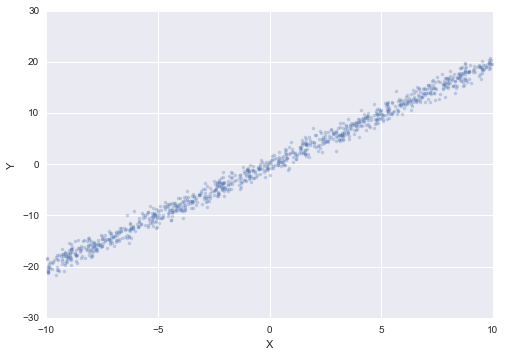

In [3]:
plt.plot(x, y, '.', alpha=0.3)
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

(b) Create a set of RBFs. Place their centers at -12 to 12 at every .5 along the $x$ axis. Set the standard deviation of each RBF to 1.

In [4]:
def rbf_kernel(x, c, sigma=1.):
    """
    Compute radial basis kernel of given domain x
    k(x, y) = exp(-(1/sigma**2)*||x-c||^2)
    """
    return np.exp(-(1./(2*sigma**2))*(x - c)**2)

def pinv(A):
    """Psuedo inverse of matrix A"""
    return np.linalg.inv(A.T.dot(A)).dot(A.T)

In [5]:
centers = np.arange(-12, 12.5, 0.5) # center of RBFs
# map x to set of RBFs
x_kernel = np.vstack([rbf_kernel(x, center) for center in centers]).T

(c) Use linear regression to find W for the weighting of each RBF and show the predicted values of $y$ for each $x$ value. Make a plot with the original $x$ vs $y$ data and the $x$ vs predicted $y$ superimposed.

In [6]:
W = np.linalg.pinv(x_kernel).dot(y) # compute W using psuedo inverse
y_hat = x_kernel.dot(W) # predicted y

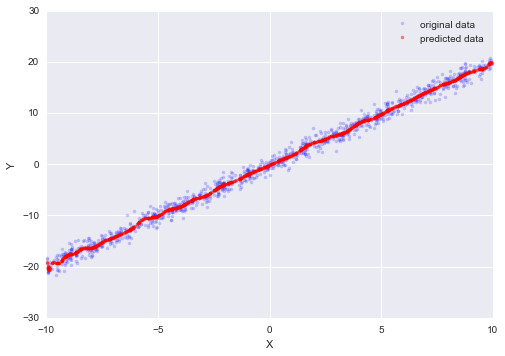

In [7]:
plt.plot(x, y, '.b', alpha=0.2)
plt.plot(x, y_hat, '.r', alpha=0.5)
plt.xlabel('X')
plt.ylabel('Y')
plt.legend(['original data', 'predicted data'])
plt.show()

(d) Add 50 data points to your $x$ vector, all at $x = 6$. Add a corresponding 50 points to your y vector, according to: $y = 2*x + 10 + e$. (the x used here should correspond to the newly added data points) I.e. displace some of the $y$ values at a particular value of $x$ – as in the paper.

In [8]:
x_concat = 6*np.ones(50)
y_concat = 2*x_concat + 10 + np.random.randn(len(x_concat))
x_new = np.hstack((x, x_concat))
y_new = np.hstack((y, y_concat))

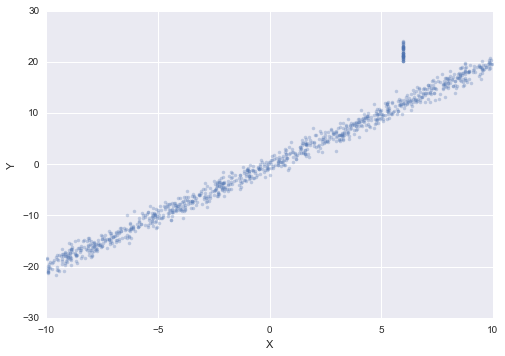

In [9]:
plt.plot(x_new, y_new, '.', alpha=0.3)
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

In [10]:
centers = np.arange(-12, 12.5, 0.5) # center of RBFs
x_new_kernel = np.vstack([rbf_kernel(x_new, center) for center in centers]).T # map x to set of RBFs

In [11]:
W = np.linalg.pinv(x_new_kernel).dot(y_new) # compute W using psuedo inverse
y_new_hat = x_new_kernel.dot(W) # predicted y

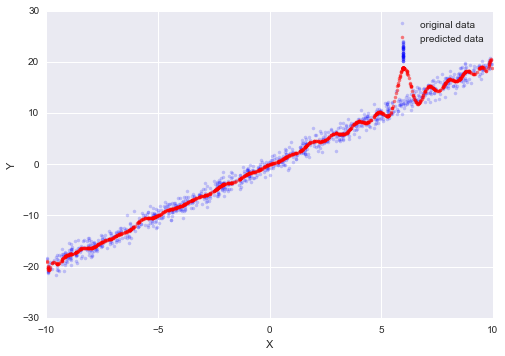

In [12]:
plt.plot(x_new, y_new, '.b', alpha=0.2)
plt.plot(x_new, y_new_hat, '.r', alpha=0.5)
plt.xlabel('X')
plt.ylabel('Y')
plt.legend(['original data', 'predicted data'])
plt.show()

## **Problem 2**

generate 2 classes data (port from given `.m` file to python)

### **a. Linear classification, 2 classes**

Your job is to create a classifier which produces the correct class labels for each data point. You’ve been provided with the ‘correct’ class labels in the variable `y` in the mfile. Use a linear classifier/perceptron: `y_hat = sign(wx)`. Note that the offset should be included in the `x` data vector (i.e. add another column of 1’s to your data, as for regression). Use gradient descent on the LMS error to find the best fit weights for this classification. Plot the identified weight vector on the same plot as the raw data, incorporating the offset when you plot the vector (i.e. it shouldn’t go through zero). Interpret the result of your classifier according to the position of this weight vector. Also plot the separation boundary for this classifier (i.e.the line orthogonal to the weight vector).

In [13]:
y = np.vstack([np.ones((100, 1)), -1*np.ones((100, 1))]).flatten()
X1 = np.hstack((np.random.normal(6, 2, size=(100,1)), np.random.normal(2, 2, size=(100, 1))))
X2 = np.hstack((np.random.normal(2, 3, size=(100,1)), np.random.normal(8, 2, size=(100, 1))))
X = np.vstack((X1, X2))

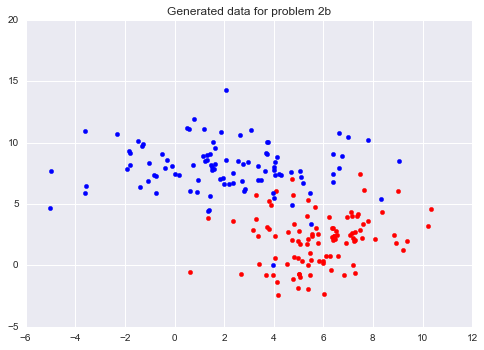

In [14]:
plt.scatter(X[(y==1).flatten(), 0], X[(y==1).flatten(), 1], color='r')
plt.scatter(X[(y==-1).flatten(), 0], X[(y==-1).flatten(), 1], color='b')
plt.title('Generated data for problem 2b')
plt.show()

In [15]:
m = len(X)
X = np.hstack((np.ones((m, 1)), X))

In [16]:
def compute_grad_lms(X, y, theta):
    """Compute gradient for LMS"""
    m = len(X)
    theta_grad = np.zeros_like(theta)
    y_hat = np.sign(X.dot(theta))
    for i in range(0, X.shape[1]):
        theta_grad[i] = -2*np.sum((y - y_hat)*X[:, i])
    return theta_grad

In [17]:
# gradient descent
J = []
theta = np.array([1, 1, 1]) # intial theta (weight)
n_iter = 5000 # number of iteration
alpha = 0.05 # learning rate
for i in range(n_iter):
    theta_grad = compute_grad_lms(X, y, theta)
    theta = theta - alpha*theta_grad

The sign of the projection of a point $x = (1, x_1, x_2)$ on the weight $\theta$ produces a prediction. We classify a point as +1 when $x \cdot \theta > 0$, therefore, we can plot the decision boundary by solving
\begin{align} x\cdot \theta & = 0 \\ \theta_0 + x_1 \theta_1 + x_2 \theta_2 & = 0 \end{align}
solving for $x_2$, we get
\begin{equation} 
x_2 = b + m x_1
\end{equation}
where $b = -\theta_0/\theta_2$ and $m = -\theta_1/\theta_2$

In [18]:
bias = -theta[0]/theta[2]
slope = -theta[1]/theta[2]

And the weight vector will be parallel to the decision boundary $m_\theta = \theta_2/\theta_1$

In [19]:
slope_weight = -1.0/slope

In [20]:
y_hat = np.sign(X.dot(theta)) # predicted class
print('Total correct classified = %s or %s percent'\
      % (np.sum(y == y_hat), 100*np.sum(y == y_hat)/m))

Total correct classified = 191 or 95.5 percent


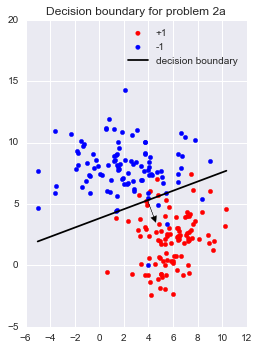

In [21]:
mean_x = X[:, 1].mean()
min_x, max_x = X[:,1].min(), X[:,1].max()
dx = 0.5
xx = np.linspace(min_x, max_x)

p1 = plt.scatter(X[(y==1).flatten(), 1], X[(y==1).flatten(), 2], color='r', label='+1')
p2 = plt.scatter(X[(y==-1).flatten(), 1], X[(y==-1).flatten(), 2], color='b', label='-1')
d = plt.plot(xx, bias + xx*slope, 'k-', label='decision boundary')
plt.arrow(mean_x, bias+mean_x*slope, dx, dx*slope_weight, 
             head_width=0.5, head_length=0.5, fc='k', ec='k', label='weight vector')

plt.title('Decision boundary for problem 2a')
plt.axes().set_aspect('equal')
plt.legend([p1, p2, d[0]], ['+1', '-1', 'decision boundary']);
plt.show()

### **b. Linear classification, 2 classes, sigmoidal output** 

Here your classifier will act according to: `y_hat = sigmoid(wx)`. Make the same plots as in (a). In addition, plot the output of the sigmoid (i.e. `y_hat`) and interpret its values.

In [22]:
def sigmoid(z):
    return 1/(1 + np.exp(-z))

def sigmoid_grad(z):
    return sigmoid(z)*(1 - sigmoid(z))

def compute_grad(X, y, theta):
    """Compute gradient"""
    m = len(X)
    theta_grad = np.zeros_like(theta)
    y_hat = sigmoid(X.dot(theta))
    for i in range(0, X.shape[1]):
        theta_grad[i] = -2*np.sum((y - y_hat)*sigmoid_grad(y_hat)*X[:, i])
    return theta_grad

def compute_cost(X, y, theta):
    """Compute cost of logistic regression"""
    m = len(X)
    y_hat = sigmoid(X.dot(theta))
    return -(1/m)*np.sum(y*np.log(y_hat) + (1-y)*np.log(1-y_hat))

In [23]:
y = np.vstack([np.ones((100, 1)), np.zeros((100, 1))]).flatten()
X1 = np.hstack((np.random.normal(6, 2, size=(100,1)), np.random.normal(2, 2, size=(100, 1))))
X2 = np.hstack((np.random.normal(2, 3, size=(100,1)), np.random.normal(8, 2, size=(100, 1))))
X = np.vstack((X1, X2))

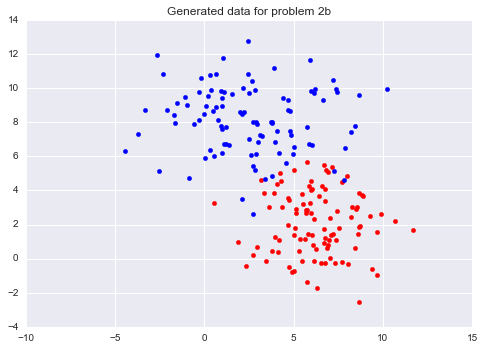

In [24]:
plt.scatter(X[(y==1).flatten(), 0], X[(y==1).flatten(), 1], color='r')
plt.scatter(X[(y==0).flatten(), 0], X[(y==0).flatten(), 1], color='b')
plt.title('Generated data for problem 2b')
plt.show()

In [25]:
m = len(X)
X = np.hstack((np.ones((m, 1)), X))

In [26]:
# gradient descent
J = []
theta = np.array([1, 1, 1]) # intial theta (weight)
n_iter = 5000 # number of iteration
alpha = 0.05 # learning rate
for i in range(n_iter):
    theta_grad = compute_grad(X, y, theta)
    theta = theta - alpha*theta_grad

In [27]:
y_hat = np.round(sigmoid(X.dot(theta))) # predicted class
print('Total correct classified = %s or %s percent'\
      % (np.sum(y == y_hat), 100*np.sum(y == y_hat)/m))

Total correct classified = 190 or 95.0 percent


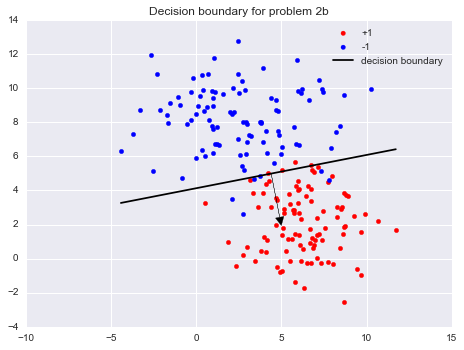

In [28]:
bias = -theta[0]/theta[2]
slope = -theta[1]/theta[2]
slope_weight = -1.0/slope

mean_x = X[:, 1].mean()
min_x, max_x = X[:,1].min(), X[:,1].max()
dx = 0.5
xx = np.linspace(min_x, max_x)

p1 = plt.scatter(X[(y==1).flatten(), 1], X[(y==1).flatten(), 2], color='r', label='+1')
p2 = plt.scatter(X[(y==0).flatten(), 1], X[(y==0).flatten(), 2], color='b', label='-1')
d = plt.plot(xx, bias + xx*slope, 'k-', label='decision boundary')
plt.arrow(mean_x, bias+mean_x*slope, dx, dx*slope_weight, 
             head_width=0.5, head_length=0.5, fc='k', ec='k', label='weight vector')

plt.title('Decision boundary for problem 2b')
plt.axes().set_aspect('equal')
plt.legend([p1, p2, d[0]], ['+1', '-1', 'decision boundary']);
plt.show()

Decision boundary and weight vector 2a for 2b, the decision boundary calculation is the same. We can either use `sigmoid(x*W) > 0.5` or `x*W > 0` to assign class to output `y` 

### **c. Linear classification, 3 classes, sigmoidal outputs**

Use the code in ‘ps1 3 classes sigmoid lda’ (3rd cell) to generate the data. Here there are three classes of data. There are three output units for the network–one for each class. When a data point is generated from the first class, the output is `[1 0 0];` from the second class, the output is `[0 1 0];` from the third class, the output is `[0 0 1]`. This is all in the variable y in the code. Your network should act according to `y_hat = sigmoid(Wx)`, where `y` is now a vector and `W` is a 3 by 3 matrix (3 dimensional output and 3 dimensional input). The predicted class for each data point

In [29]:
X1 = np.hstack((np.random.normal(6, 1, size=(100,1)), 
                np.random.normal(2, 1, size=(100,1))))
X2 = np.hstack((np.random.normal(2, 1, size=(100,1)), 
                np.random.normal(8, 1, size=(100,1))))
X3 = np.hstack((np.random.normal(-2, 1, size=(100,1)), 
                np.random.normal(-2, 1, size=(100,1))))
X = np.vstack((X1, X2, X3))
y = np.zeros((300, 3))
y[0:100, 0] = 1
y[100:200, 1] = 1
y[200:300, 2] = 1

In [30]:
ind1 = np.where(y[:,0]==1)[0]
ind2 = np.where(y[:,1]==1)[0]
ind3 = np.where(y[:,2]==1)[0]

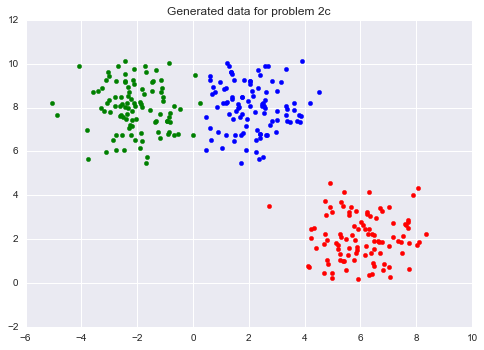

In [31]:
plt.scatter(X[ind1, 0], X[ind1, 1], color='r')
plt.scatter(X[ind2, 0], X[ind2, 1], color='b')
plt.scatter(X[ind3, 0], X[ind2, 1], color='g')
plt.title('Generated data for problem 2c')
plt.show()

In [32]:
m = len(X)
X = np.concatenate((np.ones((m, 1)), X), axis=1)

In [33]:
def compute_grad(X, y, W):
    """Compute gradient"""
    m = len(X)
    W_grad = np.zeros_like(W)
    y_hat = sigmoid(X.dot(W))
    for j in range(W.shape[1]):
        W_grad[:, j] = -2*((y[:,j] - y_hat[:,j])*sigmoid_grad(y_hat[:,j])).dot(X)
    return W_grad

In [34]:
# gradient descent
J = []
W = np.random.rand(3,3) # intial weight
n_iter = 5000 # number of iteration
alpha = 0.05 # learning rate
for i in range(n_iter):
    W_grad = compute_grad(X, y, W)
    W = W - alpha*W_grad

In [35]:
y_hat = sigmoid(X.dot(W))

In [36]:
y_hat.argmax(1) # class for each datapoints

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2])

In [37]:
print('Predition of correct class = %s'\
      %np.sum([a==b for (a, b) in zip(y.argmax(axis=1), y_hat.argmax(axis=1))]))

Predition of correct class = 300


In [38]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y.argmax(1), y_hat.argmax(1))
print("Confusion matrix")
cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

Confusion matrix


array([[ 1.,  0.,  0.],
       [ 0.,  1.,  0.],
       [ 0.,  0.,  1.]])

## **Problem 3: Classfier - back propagation** 

Your job is to create code implementing back propagation for a two layer neural network which can perform this classification. Use a network with 4 hidden units, as indicated in the shell code. Don’t worry about cross validation and all that – feel free to just use all the data.

In [39]:
sd = .85
X1 = np.vstack((np.random.normal(0, sd, size=(50,1)), 
                np.random.normal(0, sd, size=(50,1)), 
                np.random.normal(0, sd, size=(50,1))))
X2 = np.vstack((np.random.normal(0, sd, size=(50,1)), 
                np.random.normal(5, sd, size=(50,1)), 
                np.random.normal(10, sd, size=(50,1))))
# X3 = np.ones((150, 1))
X = np.concatenate((X1, X2), axis=1)
y = np.zeros((150, 3))
y[0:50, 0] = 1
y[50:100, 1] = 1
y[100:150, 2] = 1

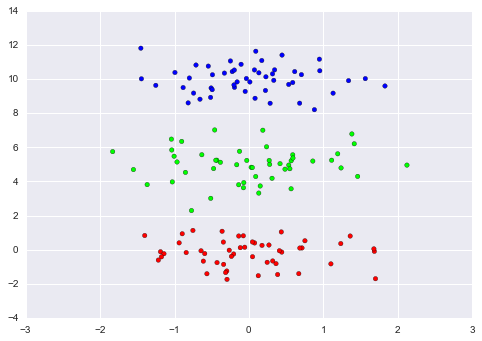

In [40]:
plt.scatter(X[:,0], X[:,1], c=y);

In [41]:
ninput = 2
nhidden = 4
noutput = 3
W = np.random.uniform(-1, 1, size=(ninput+1, nhidden)) - 0.5
V = np.random.uniform(-1, 1, size=(nhidden+1, noutput)) - 0.5

In [42]:
def predict(W, V, X):
    """Do forward propagation given first and second layers"""
    n, m = X.shape
    a1 = np.concatenate((np.ones((n,1)), X), axis=1)
    z2 = a1.dot(W)
    a2 = sigmoid(z2)
    a2 = np.concatenate((np.ones((n,1)), a2), axis=1)
    z3 = a2.dot(V)
    a3 = sigmoid(z3)
    h = a3
    return h

In [43]:
def compute_grad_bp(W, V, X, Y):
    """
    Compute gradient of NN parameters for one iteration
    using back propagation
    """
    # initialize few parameters
    n, m = X.shape
    
    dW = np.zeros_like(W)
    dV = np.zeros_like(V)
    
    a1 = np.concatenate((np.ones((n,1)), X), axis=1)
    z2 = a1.dot(W)
    a2 = sigmoid(z2)
    a2 = np.concatenate((np.ones((n,1)), a2), axis=1)
    z3 = a2.dot(V)
    a3 = sigmoid(z3)
    h = a3
    
    # back propagation
    delta3 = h - Y
    delta2 = delta3.dot(V[1::,:].T)*sigmoid_grad(z2)
    
    dW = (1/m)*((delta2.T).dot(a1)).T
    dV = (1/m)*((delta3.T).dot(a2)).T
    
    return dW, dV

In [44]:
# gradient descent to find final neural nets parameter
n_iter = 4000
mu = 0.01
dW = np.zeros_like(W)
dV = np.zeros_like(V)
for i in range(n_iter):
    dW, dV = compute_grad_bp(W, V, X, y)
    W = W - mu*dW
    V = V - mu*dV

In [45]:
y.argmax(axis=1) # output class for each datapoint

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [46]:
print("Correct class = %s from total %s"\
      % (np.sum([a==b for (a,b) in zip(y.argmax(axis=1), 
                                       np.argmax(predict(W, V, X), axis=1))]), len(y)))

Correct class = 150 from total 150
